# Training with AF3 structures

In [1]:
import os
import torch

from antipasti.preprocessing.preprocessing import Preprocessing
from antipasti.utils.torch_utils import create_test_set, save_checkpoint, load_checkpoint, training_routine

In [2]:
# Assign directories

# AF3 directories
AF_INPUT_PATH = '../af3/af_input/'
AF_OUTPUT_PATH = '../af3/af_output/'

# Structures directory
STRUCTURES_PATH = '../data/structures/'

# Data directories
DATA_PATH = '../data/'
RESIDUES_DIR = 'lists_of_residues/'
CHAIN_LENGTHS_DIR = 'chain_lengths/'
DCCM_MAPS_DIR = 'dccm_maps/'

## Pre-preprocessing

### Loading database

exploration

In [51]:
s6vyb = "MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNEVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPSGAGSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKGSGRENLYFQGGGGSGYIPEAPRDGQAYVRKDGEWVLLSTFLGHHHHHHHH"
s6vxx = "MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPSGAGSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDPPEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKGSGRENLYFQGGGGSGYIPEAPRDGQAYVRKDGEWVLLSTFLGHHHHHHHH"

In [52]:
print(len(s6vyb))
print(len(s6vxx))


1281
1281


In [54]:
prot009 = "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPSGAGSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCSCGSCCKFDEDDSEPVLKGVKLHYYT"

In [55]:
print(len(prot009))

1273


In [68]:
s_rbd = prot009[319-1:541]
print(len(s_rbd))
print(s_rbd)

223
RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNF


In [53]:
indices = [i for i in range(len(s6vyb)) if s6vyb[i] != s6vxx[i]]
print(indices)

[625]


In [38]:
s7bz5 = "RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFHHHHHH"
s7c01 = "RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFHHHHHH"
s7bwj = "RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKHHHHHH"

In [70]:
s_rbd in s7c01

True

In [22]:
s7bwj[:-6] in s7c01

True

In [23]:
len(s7bz5)

229

In [25]:
len(s7bwj)

217

In [24]:
541 - 319 + 1

223

1281

In [11]:
import os
import pandas as pd

In [12]:
# # Test sequence 1hh6

# light_sequence = "DIKMTQSPSSMYTSLGERVTITCKASQDINSFLTWFLQKPGKSPKTLIYRANRLMIGVPSRFSGSGSGQTYSLTISSLEYEDMGIYYCLQYDDFPLTFGAGTKLDLKRADAAPTVSIFPPSSEQLTSGGASVVCFLNNFYPKEINVKWKIDGSERQNGVLDSWTEQDSKDSTYSMSSTLTLTKDEYERHNSYTCEATHKTSTSPIVKSFNRNEC"
# heavy_sequence = "QDQLQQSGAELVRPGASVKLSCKALGYIFTDYEIHWVKQTPVHGLEWIGGIHPGSSGTAYNQKFKGKATLTADKSSTTAFMELSSLTSEDSAVYYCTRKDYWGQGTLVTVSAAKTTAPSVYPLVPVCGGTTGSSVTLGCLVKGYFPEPVTLTWNSGSLSSGVHTFPALLQSGLYTLSSSVTVTSNTWPSQTITCNVAHPASSTKVDKKIEPRV"
# antigen_sequence = "DATPEDLGARL"

# sequences = [heavy_sequence + ":" + light_sequence + ":" + antigen_sequence]# load the sequences, making sure you just have heavy_chain:light_chain
# pdb_ids = ["1hh6"]

In [13]:
# # Test sequence no Ag, no structure

# pdb_ids.append("00h4")

# vh_chain = "QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLEWMGRINPNSGGTNYAQKFQGRVTMTRDTSISTAYMELSRLRSDDTAVYYCARVPYCSSTSCHRDWYFDLWGRGTLVTVSS"
# vl_chain = "DIQMTQSPLSLPVTPGEPASISCRSSQSLLDSDDGNTYLDWYLQKPGQSPQLLIYTLSYRASGVPDRFSGSGSGTDFTLKISRVEAEDVGVYYCMQRIEFPLTFGGGTKVEIK"

# chain = vh_chain + ":" + vl_chain
# sequences.append(chain)


In [14]:
# # Test sequence with 3 Ags
# pdb_ids.append("3lqa")
# chainC = "KKVVLGKKGDTVELTCTASQKKSIQFHWKNSNQIKILGNQGSFLTKGPSKLNDRADSRRSLWDQGNFPLIIKNLKIEDSDTYICEVEDQKEEVQLLVFGLTANSDTHLLQGQSLTLTLESPPGSSPSVQCRSPRGKNIQGGKTLSVSQLELQDSGTWTCTVLQNQKKVEFKIDIVVLAFQKAIDGRHHHHHH"
# chainG = "EIVLENVIENFNMWKNDMVDQMHQDIISLWDQSLKPCVKLTPLCVGAGNCNTSTIAQACPKVSFDPIPIHYCAPAGYAILKCNDKTFNGIGPCNNVSTVQCTHGIKPVVSTQLLLNGSLAEEEVVIRSENISNNVKTIIVHLTESVNITCIGAGHCNINEKAWNETLKKVVEKLVKYFPNKTIEFAPPVGGDLEITTHSFNCGGEFFYCNTTKLFNSIHNSTDSTVNSTDSTAETGNSTNTNITLPCRIRQIINMWQEVGRAMYAPPSKGNITCISDITGLLLTRDGGENKTENNDTEIFRPGGGDMKDNWRSELYKYKVVEIKSGHHHHHH"
# chainH = "QVQVVQSGAEVRKPGASVKVSCKVSGFTLTGLSIHWVRQAPGKGLEWMGGFGPEENEIIYAQKFQGRVSMTEDTSTNTAYMELSSLRSEDTAVYYCATGGNYYNLWTGYYPLAYWGQGTLVTVSSASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCDKT"
# chainL = "QSVLTQPPSVSAAPGQKVTISCSGSSSNIGKNYVSWYQQLPGAAPKLLIFDDTQRPSGIPDRFSGSKSGTSATLAITGLQTGDEADYYCGTWDSSLSTGQLFGGGTKLTVLGQPKAAPSVTLFPPSSEELQANKATLVCLISDFYPGAVTVAWKADSSPVKAGVETTTPSKQSNNKYAASSYLSLTPEQWKSHRSYSCQVTHEGSTVEKTMAHAECS"

# chain = chainC + ":" + chainG + ":" + chainH + ":" + chainL
# sequences.append(chain)


In [12]:
# Ab-Cov

# Directory containing the .csv files
csv_dir = '../databases/Ab-Cov'

# List to hold individual dataframes
dataframes = []

# Iterate over files in the directory
for filename in os.listdir(csv_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(csv_dir, filename)
        if filename.startswith('covabseq'):
            df = pd.read_csv(file_path)
            dataframes.append(df)

# Concatenate all dataframes into one
df_abcov_all = pd.concat(dataframes, ignore_index=True)


In [13]:
print(df_abcov_all.shape)
df_abcov_all.columns

(1963, 14)


Index(['Entry', 'Antibody name', 'Type', 'IC50', 'EC50',
       'Binding Affinity (KD)', 'Neutralizes', 'Viral protein:epitope', 'PMID',
       'Year', 'Structures', 'Mutational profile', 'VH sequence',
       'VL sequence'],
      dtype='object')

In [14]:
# Ab-Cov virus sequence

prot009 = "MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPSGAGSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASANLAATKMSECVLGQSKRVDFCGKGYHLMSFPQSAPHGVVFLHVTYVPAQEKNFTTAPAICHDGKAHFPREGVFVSNGTHWFVTQRNFYEPQIITTDNTFVSGNCDVVIGIVNNTVYDPLQPELDSFKEELDKYFKNHTSPDVDLGDISGINASVVNIQKEIDRLNEVAKNLNESLIDLQELGKYEQYIKWPWYIWLGFIAGLIAIVMVTIMLCCMTSCCSCLKGCSCGSCCKFDEDDSEPVLKGVKLHYYT"

### Producing summary dataframe

In [15]:
summary_file_name = "abcov_sarscov2_summary.tsv"

In [16]:
# Select the required columns
df_abcov_summary = df_abcov_all[['Entry', 'Antibody name', 'Neutralizes', 'Viral protein:epitope', 'Binding Affinity (KD)', 'Structures', 'VH sequence', 'VL sequence']]

# Rename the columns
df_abcov_summary.columns = ['entry', 'ab_name', 'virus', 'antigen_type', 'affinity', 'pdb', 'VH', 'VL']

df_abcov_summary['entry'] = df_abcov_summary['entry'].str[-4:]

df_abcov_summary = df_abcov_summary.dropna(subset=['affinity']).sort_values(by='entry')

df_abcov_summary = df_abcov_summary[~(df_abcov_summary['VH'] == 'ND')]
df_abcov_summary = df_abcov_summary[~(df_abcov_summary['VL'] == 'ND')]

df_abcov_summary.reset_index(drop=True)



/var/folders/wj/nnn2yfm13499ln550rx75srw0000gn/T/ipykernel_27515/4118530092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abcov_summary['entry'] = df_abcov_summary['entry'].str[-4:]


,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL
0,0001,B38,SARS-CoV-2,S: RBD,70.1,7BZ5,EVQLVESGGGLVQPGGSLRLSCAASGFIVSSNYMSWVRQAPGKGLE...,DIVMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...
1,0002,H4,SARS-CoV-2,S: RBD,4.48,NaN,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,DIQMTQSPLSLPVTPGEPASISCRSSQSLLDSDDGNTYLDWYLQKP...
2,0003,CA1,SARS-CoV-2,S: RBD,4.68,NaN,EVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,DIVMTQTPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
3,0004,CB6,SARS-CoV-2,S: RBD,2.49,7C01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,DIVMTQSPSSLSASVGDRVTITCRASQSISRYLNWYQQKPGKAPKL...
4,0005,P2B-2F6,SARS-CoV-2,S: RBD,5.14,7BWJ,QVQLQESGPGLVKPSETLSLTCTVSGYSISSGYYWGWIRQPPGKGL...,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...
...,...,...,...,...,...,...,...,...
483,1958,ADG-3,SARS-CoV,S,0.91,NaN,EVQLVESGGGLIQPGGSLRLSCAASGFPFKGTYMTWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGGSSNIGSNSVNWYQQLPGTAPK...
484,1959,ADG-3,WIV1,S,0.72,NaN,EVQLVESGGGLIQPGGSLRLSCAASGFPFKGTYMTWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGGSSNIGSNSVNWYQQLPGTAPK...
485,1960,ADG-3,SHC014,S,0.93,NaN,EVQLVESGGGLIQPGGSLRLSCAASGFPFKGTYMTWVRQAPGKGLE...,QSVLTQPPSASGTPGQRVTISCSGGSSNIGSNSVNWYQQLPGTAPK...
486,1961,Fab22,MERS-CoV,S: S2,6.7,7S3M;7S3N,EVQLQQPGPVLVKPGASVRMSCKASGYRITDNFMNWVKQSHGKSLE...,DVVLTQTPLSLPVNIGDQASISCKSTKSLLNRDGFTFLDWYLQKPG...


In [20]:
def convert_affinity(value):
    try:
        return float(value) / 10**9
    except ValueError:
        if '>' in value:
            return 501 / 10**9
        elif '<' in value:
            return 0.0009 / 10**9
        elif '-' in value:
            a, b = map(float, value.split('-'))
            return ((a + b) / 2) / 10**9
        else:
            raise ValueError(f"Unexpected format for affinity value: {value}")

df_abcov_summary['affinity'] = df_abcov_summary['affinity'].apply(convert_affinity)


In [22]:
df_abcov_summary['affinity'].describe()
df_abcov_summary.head()

,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL
1463,0001,B38,SARS-CoV-2,S: RBD,7.010000e-08,7BZ5,EVQLVESGGGLVQPGGSLRLSCAASGFIVSSNYMSWVRQAPGKGLE...,DIVMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...
1464,0002,H4,SARS-CoV-2,S: RBD,4.480000e-09,NaN,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,DIQMTQSPLSLPVTPGEPASISCRSSQSLLDSDDGNTYLDWYLQKP...
1465,0003,CA1,SARS-CoV-2,S: RBD,4.680000e-09,NaN,EVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,DIVMTQTPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
1466,0004,CB6,SARS-CoV-2,S: RBD,2.490000e-09,7C01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,DIVMTQSPSSLSASVGDRVTITCRASQSISRYLNWYQQKPGKAPKL...
1467,0005,P2B-2F6,SARS-CoV-2,S: RBD,5.140000e-09,7BWJ,QVQLQESGPGLVKPSETLSLTCTVSGYSISSGYYWGWIRQPPGKGL...,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...


In [23]:
print(df_abcov_summary.shape)
print(df_abcov_summary.columns)


(488, 8)
Index(['entry', 'ab_name', 'virus', 'antigen_type', 'affinity', 'pdb', 'VH',
       'VL'],
      dtype='object')


In [24]:
df_abcov_summary['antigen_type'].value_counts()



antigen_type
S: RBD            425
S: NTD             32
S                  13
S: S2              12
S: S1 non-RBD       4
S: non-RBD          1
S: RBD/non-RBD      1
Name: count, dtype: int64

In [25]:
df_abcov_summary['virus'].value_counts()

virus
SARS-CoV-2                       425
MERS-CoV                          21
SARS-CoV-2;SARS-CoV               18
SARS-CoV,SARS-CoV-2                6
SARS-CoV                           6
SARS-CoV;SARS-CoV-2                5
WIV1                               3
SHC014                             2
SARS-CoV-2,MERS-CoV,HKU4,OC43      1
SARS-CoV;SARS-CoV2                 1
Name: count, dtype: int64

In [26]:
df_abcov_summary['pdb'].notna().sum()

np.int64(111)

In [27]:
# Only keeping the SARS-CoV-2 virus antibodies

df_abcov_sarscov2_summary = df_abcov_summary[df_abcov_summary['virus'] == 'SARS-CoV-2'].reset_index(drop=True)
print(df_abcov_sarscov2_summary.shape)
df_abcov_sarscov2_summary.head()

(425, 8)


,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL
0,0001,B38,SARS-CoV-2,S: RBD,7.010000e-08,7BZ5,EVQLVESGGGLVQPGGSLRLSCAASGFIVSSNYMSWVRQAPGKGLE...,DIVMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...
1,0002,H4,SARS-CoV-2,S: RBD,4.480000e-09,NaN,QVQLVQSGAEVKKPGASVKVSCKASGYTFTGYYMHWVRQAPGQGLE...,DIQMTQSPLSLPVTPGEPASISCRSSQSLLDSDDGNTYLDWYLQKP...
2,0003,CA1,SARS-CoV-2,S: RBD,4.680000e-09,NaN,EVQLVQSGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,DIVMTQTPATLSLSPGERATLSCRASQSVSSYLAWYQQKPGQAPRL...
3,0004,CB6,SARS-CoV-2,S: RBD,2.490000e-09,7C01,EVQLVESGGGLVQPGGSLRLSCAASGFTVSSNYMSWVRQAPGKGLE...,DIVMTQSPSSLSASVGDRVTITCRASQSISRYLNWYQQKPGKAPKL...
4,0005,P2B-2F6,SARS-CoV-2,S: RBD,5.140000e-09,7BWJ,QVQLQESGPGLVKPSETLSLTCTVSGYSISSGYYWGWIRQPPGKGL...,QSALTQPPSASGSPGQSVTISCTGTSSDVGGYNYVSWYQQHPGKAP...


In [28]:
# Create masks for non-alphabet characters or NaNs in 'VH' and 'VL'
mask_vh = df_abcov_sarscov2_summary['VH'].notna() & ~df_abcov_sarscov2_summary['VH'].str.match(r'^[A-Z]+$', na=False)
mask_vl = df_abcov_sarscov2_summary['VL'].notna() & ~df_abcov_sarscov2_summary['VL'].str.match(r'^[A-Z]+$', na=False)

# Combine masks and filter the DataFrame
invalid_sequences = df_abcov_sarscov2_summary[mask_vh | mask_vl]
invalid_sequences

,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL
120,0277,Nb21,SARS-CoV-2,S: RBD,9.000000e-13,NaN,QVQLVESGGGLVQAGGSLRLSCAVSGLGAHRVGWFRRAPGKEREFV...,NaN
249,0890,BLN4,SARS-CoV-2,S: NTD,3.400000e-08,NaN,QLQLQESGPGLVKPSQTLSLTCTVSGGSISSGSYYWSWIRQPAGKG...,NILTQPPSASGTPGQRVTISCSGSSSNIGSNTVN WYQQLPGTAPK...
250,0891,BLN6,SARS-CoV-2,S: NTD,1.580000e-08,NaN,QVQLQESGPGLVKPSQTLSLTCTVSGGSISSGSYYWSWIRQPAGKG...,QSALTQPASASGSPGQSVTISCTGSSSDVGGYNFVSWYQQHPGKAP...
251,0892,BLN7,SARS-CoV-2,S: NTD,2.700000e-09,NaN,EVQLVQSGAEVKKPGASVKVSCKVSGYTLPELSMHWVRQAPGKGLE...,QSVLTQPASVSGSPGQSITISCTGTSSDVGGYNYVSWYQQHPGKAP...
252,0893,BLN8,SARS-CoV-2,S: NTD,4.300000e-09,NaN,EVQLLESGGGVVQPGRSLRLSCAASGFTFSSYAMHWVRQAPGKGLQ...,NFMLTQPPSVSVSPGQTASITCSGDKLGDKYASWYQQKPGQSPVLV...
254,0895,BLN10,SARS-CoV-2,S: NTD,4.300000e-09,NaN,QVQLVQSGAEVKKPGASVKVSCKVSGYTLPELSMHWVRQAPGKGLE...,SYELIQEPSVSVSPGQTARITCQGDSLRSYYASWYQQKPGQAPVLV...
255,0896,BLN12,SARS-CoV-2,S: NTD,9.000000e-10,NaN,QVQLQQSGAEVKKPGASVKVSCKVSGYTLTELSMHWVRQAPGKGLE...,DIVMTQSPLSSPVTLGQPASISCRSSQSLVHSDGNTYLSWLQQRPG...
402,1829,eCC12.1.1,SARS-CoV-2,S: RBD,9.920000e-11,NaN,EVQLVESGGGLIQPGGSLRLSCAASGLTVSSNYMVWVRQAPGKGLE...,DIVMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...
418,1845,eCC6.30.5,SARS-CoV-2,S: RBD,1.100000e-10,NaN,QVQLVQSGAEVKKPGSSVKVSCKASGGAFSIYAITWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCHASQSISSYLNWYQQEAGKAPKL...


In [29]:
invalid_sequences.loc[250]['VL']

'QSALTQPASASGSPGQSVTISCTGSSSDVGGYNFVSWYQQHPGKAPKLIIYEVSKRPSGVPNRFSGSKSGNTASLTVSGLQADDEALYYCSSYAGSNNYVFGPGTKVTVL '

In [30]:
df_abcov_sarscov2_summary['VH'] = df_abcov_sarscov2_summary['VH'].str.replace(' ','', regex=True).str.upper()
df_abcov_sarscov2_summary['VL'] = df_abcov_sarscov2_summary['VL'].str.replace(' ','', regex=True).str.upper()

In [31]:
# Create masks for non-alphabet characters or NaNs in 'VH' and 'VL'
mask_vh = df_abcov_sarscov2_summary['VH'].notna() & ~df_abcov_sarscov2_summary['VH'].str.match(r'^[A-Z]+$', na=False)
mask_vl = df_abcov_sarscov2_summary['VL'].notna() & ~df_abcov_sarscov2_summary['VL'].str.match(r'^[A-Z]+$', na=False)

# Combine masks and filter the DataFrame
invalid_sequences = df_abcov_sarscov2_summary[mask_vh | mask_vl]
invalid_sequences

,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL


In [32]:
df_abcov_sarscov2_summary.to_csv(os.path.join('../data',summary_file_name), sep='\t', index=False)

### Getting lists of residues and producing AF3 inputs

In [33]:
from anarci import run_anarci
import numpy as np
import os
import json

In [34]:
def sequences_to_afinput(name, sequences_dict, save_path, file_name = None):
    if file_name is None:
        file_name = name
    file_name += '.json'
    input_data = {
        "name": name,
        "modelSeeds": [1],
        "sequences": [
            {"protein": {"id": code, "sequence": seq}}
            for code, seq in sequences_dict.items()
        ],
        "dialect": "alphafold3",
        "version": 1
    }
    
    with open(os.path.join(save_path, file_name), 'w') as json_file:
        json.dump(input_data, json_file, indent=4)

In [35]:
def sequences_to_residues(entries, sequences, tag='', residues_path = os.path.join(DATA_PATH,RESIDUES_DIR), af_input_path = AF_INPUT_PATH, get_af_inputs = True):

    residues_dict_anarci = {}
    
    for i, seq in enumerate(sequences):

        try:
            split_seq = seq.split(':')
        except Exception as e:
            print(f"Error: {e}")
            print(f"Entry: {entries[i]}")
            print(f"Sequence: {seq}")
            return

        
        idx_chaintype = {'VH': None, 'VL': None, 'Ag': []}
        residues = []

        for j, sub_seq in enumerate(split_seq):
            results = run_anarci([(f'chain{j}', sub_seq)], scheme='chothia')

            # Checking which chain is heavy/light/antigen
            if results[2][0]:
                anarci_chain = results[1][0][0][0]
                if anarci_chain[-1][0][0] > 107 and  anarci_chain[-1][0][0] <= 113:            
                    chaintype = 'VH'
                    res_code = 'A'
                elif anarci_chain[-1][0][0] <= 107:
                    chaintype = 'VL'
                    res_code = 'B'
                else:
                    print(f"Sequence: {anarci_chain}")
                    raise ValueError(f"Unknown chain type for sequence {j} of {entries[i]}")
            else:
                chaintype = 'Ag'
                res_code = chr(ord('C') + len(idx_chaintype['Ag']))  # Assign C, D, E, ... for antigens
                    
            if chaintype == 'Ag':
                idx_chaintype[chaintype].append(j)
            else:
                if idx_chaintype[chaintype]:
                    raise ValueError(f"Multiple {chaintype} chains for antibody {entries[i]}")
                idx_chaintype[chaintype] = j

            res_list = []
            if chaintype == 'VH' or chaintype == 'VL':
                for pos, residue in anarci_chain:
                    if residue != '-':
                        full_res = f'{residue}{res_code}{str(pos[0]).rjust(3)}'
                        if pos[1].strip():
                            full_res += pos[1].strip()
                        else:
                            full_res += ' '
                        res_list.append(full_res)
            elif chaintype == 'Ag':
                for idx, residue in enumerate(sub_seq):
                    pos = idx + 1
                    full_res = f'{residue}{res_code}{str(pos).rjust(3)} '
                    res_list.append(full_res)
            else:
                raise ValueError("!!!") # If chaintype isn't VH, VL, or Ag something has gone wrong
            residues.append(res_list)

        if get_af_inputs:
            sequences_to_afinput(
                entries[i],
                {res_code : split_seq[idx_chaintype[chaintype]] for chaintype, res_code in [('VH','A'), ('VL','B')] if idx_chaintype[chaintype] is not None} |
                {chr(ord('C') + k): split_seq[j] for k, j in enumerate(idx_chaintype['Ag'])},
                af_input_path,
                file_name = tag+entries[i]
            )

        list_of_residues = ['START-Ab']
        if idx_chaintype['VH'] is not None:
            list_of_residues += residues[idx_chaintype['VH']]
        if idx_chaintype['VL'] is not None:
            list_of_residues += residues[idx_chaintype['VL']]
        list_of_residues += ['END-Ab']
        for k, j in enumerate(idx_chaintype['Ag']):
            list_of_residues += residues[j]
        residues_dict_anarci[entries[i]] = list_of_residues

    # Saving ANARCI residues
    for entry in entries:
        save_filename = f'{entry}.npy'
        np.save(os.path.join(residues_path,save_filename), residues_dict_anarci[entry])
    
    return residues_dict_anarci

In [70]:
# sequences_to_residues(pdb_ids, sequences, tag='test', get_af_inputs=False)

In [71]:
# df_abcov_summary = df_abcov_summary[~df_abcov_summary['entry'].isin(['0178', '0186'])] # removing issues

In [36]:
entries = df_abcov_sarscov2_summary['entry'].tolist()
sequences = (df_abcov_sarscov2_summary['VH'] + ':' + df_abcov_sarscov2_summary['VL'].fillna('') + ':' + prot009).tolist()
sequences = [seq.replace('::', ':') for seq in sequences]
residues_dict_anarci = sequences_to_residues(entries, sequences, tag='AbCov', residues_path=os.path.join(DATA_PATH, RESIDUES_DIR), get_af_inputs = False)

In [37]:
df_abcov_sarscov2_summary[df_abcov_sarscov2_summary['entry']=='1845']

,entry,ab_name,virus,antigen_type,affinity,pdb,VH,VL
418,1845,eCC6.30.5,SARS-CoV-2,S: RBD,1.100000e-10,NaN,QVQLVQSGAEVKKPGSSVKVSCKASGGAFSIYAITWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCHASQSISSYLNWYQQEAGKAPKL...


In [38]:
residues_dict_anarci['1845']

['START-Ab',
 'QA  1 ',
 'VA  2 ',
 'QA  3 ',
 'LA  4 ',
 'VA  5 ',
 'QA  6 ',
 'SA  7 ',
 'GA  8 ',
 'AA  9 ',
 'EA 10 ',
 'VA 11 ',
 'KA 12 ',
 'KA 13 ',
 'PA 14 ',
 'GA 15 ',
 'SA 16 ',
 'SA 17 ',
 'VA 18 ',
 'KA 19 ',
 'VA 20 ',
 'SA 21 ',
 'CA 22 ',
 'KA 23 ',
 'AA 24 ',
 'SA 25 ',
 'GA 26 ',
 'GA 27 ',
 'AA 28 ',
 'FA 29 ',
 'SA 30 ',
 'IA 31 ',
 'YA 32 ',
 'AA 33 ',
 'IA 34 ',
 'TA 35 ',
 'WA 36 ',
 'VA 37 ',
 'RA 38 ',
 'QA 39 ',
 'AA 40 ',
 'PA 41 ',
 'GA 42 ',
 'QA 43 ',
 'GA 44 ',
 'LA 45 ',
 'EA 46 ',
 'WA 47 ',
 'MA 48 ',
 'GA 49 ',
 'GA 50 ',
 'LA 51 ',
 'LA 52 ',
 'PA 52A',
 'LA 53 ',
 'LA 54 ',
 'GA 55 ',
 'TA 56 ',
 'AA 57 ',
 'NA 58 ',
 'YA 59 ',
 'AA 60 ',
 'QA 61 ',
 'KA 62 ',
 'FA 63 ',
 'QA 64 ',
 'GA 65 ',
 'RA 66 ',
 'VA 67 ',
 'TA 68 ',
 'IA 69 ',
 'TA 70 ',
 'AA 71 ',
 'DA 72 ',
 'KA 73 ',
 'SA 74 ',
 'TA 75 ',
 'SA 76 ',
 'TA 77 ',
 'AA 78 ',
 'YA 79 ',
 'MA 80 ',
 'EA 81 ',
 'LA 82 ',
 'SA 82A',
 'SA 82B',
 'LA 82C',
 'RA 83 ',
 'SA 84 ',
 'EA 85 ',
 'DA 86 

In [20]:
# residues_dict_anarci = {}
 
# for i, seq in enumerate(fasta_sequences):
#     split_seq = seq.split(':')
#     if len(split_seq) == 2:
#         heavy_seq, light_seq = split_seq
#         ag_seq = None
#     elif(len(split_seq)) == 3:
#         heavy_seq, light_seq, ag_seq = split_seq
#     else:
#         raise ValueError("Unknown sequence")
 
#     heavy_results = run_anarci([('heavy', heavy_seq)], scheme='chothia')
#     if not heavy_results[2][0]:
#         print(f'Skipping heavy chain {pdb_ids[i]}')
#         continue

#     heavy_residues = []
#     for pos, residue in heavy_results[1][0][0][0]:
#         if residue != '-':
#             full_res = f'{residue}A{str(pos[0]).rjust(3)}'
#             if pos[1].strip():
#                 full_res += pos[1].strip()
#             else:
#                 full_res += ' '
#             heavy_residues.append(full_res)

#     light_results = run_anarci([('light', light_seq)], scheme='chothia')
#     if not light_results[2][0]:
#         print(f'Skipping light chain {pdb_ids[i]}')
#         continue    
#     light_residues = []
#     for pos, residue in light_results[1][0][0][0]:
#         if residue != '-':
#             full_res = f'{residue}B{str(pos[0]).rjust(3)}'
#             if pos[1].strip():
#                 full_res += pos[1].strip()
#             else:
#                 full_res += ' '
#             light_residues.append(full_res)

#     ag_residues = []
#     if ag_seq:
#         for idx, residue in enumerate(ag_seq):
#             pos = idx + 1
#             full_res = f'{residue}C{str(pos).rjust(3)} '
#             ag_residues.append(full_res)
    
#     list_of_residues = ['START-Ab'] + heavy_residues + light_residues + ['END-Ab'] + ag_residues
#     residues_dict_anarci[pdb_ids[i]]=list_of_residues

#### Comparing to old data

In [32]:
import numpy as np
import os

residues_path = '../OLD/data/lists_of_residues/'
residues_dict_old = {}

for filename in os.listdir(residues_path):
    file_path = os.path.join(residues_path, filename)
    residues = np.load(file_path)
    filename_without_ext = os.path.splitext(filename)[0]
    residues_dict_old[filename_without_ext] = residues




array(['START-Ab', 'QB  1 ', 'DB  2 ', 'QB  3 ', 'LB  4 ', 'QB  5 ',
       'QB  6 ', 'SB  7 ', 'GB  8 ', 'AB  9 ', 'EB 10 ', 'LB 11 ',
       'VB 12 ', 'RB 13 ', 'PB 14 ', 'GB 15 ', 'AB 16 ', 'SB 17 ',
       'VB 18 ', 'KB 19 ', 'LB 20 ', 'SB 21 ', 'CB 22 ', 'KB 23 ',
       'AB 24 ', 'LB 25 ', 'GB 26 ', 'YB 27 ', 'IB 28 ', 'FB 29 ',
       'TB 30 ', 'DB 31 ', 'YB 32 ', 'EB 33 ', 'IB 34 ', 'HB 35 ',
       'WB 36 ', 'VB 37 ', 'KB 38 ', 'QB 39 ', 'TB 40 ', 'PB 41 ',
       'VB 42 ', 'HB 43 ', 'GB 44 ', 'LB 45 ', 'EB 46 ', 'WB 47 ',
       'IB 48 ', 'GB 49 ', 'GB 50 ', 'IB 51 ', 'HB 52 ', 'PB 52A',
       'GB 53 ', 'SB 54 ', 'SB 55 ', 'GB 56 ', 'TB 57 ', 'AB 58 ',
       'YB 59 ', 'NB 60 ', 'QB 61 ', 'KB 62 ', 'FB 63 ', 'KB 64 ',
       'GB 65 ', 'KB 66 ', 'AB 67 ', 'TB 68 ', 'LB 69 ', 'TB 70 ',
       'AB 71 ', 'DB 72 ', 'KB 73 ', 'SB 74 ', 'SB 75 ', 'TB 76 ',
       'TB 77 ', 'AB 78 ', 'FB 79 ', 'MB 80 ', 'EB 81 ', 'LB 82 ',
       'SB 82A', 'SB 82B', 'LB 82C', 'TB 83 ', 'SB 84 ', 'EB

In [40]:
# List of residues comparison

id_check = '3lqa'

print("(ANARCI, OLD)")

for res_anarci, res_old in zip(residues_dict_anarci[id_check], residues_dict_old[id_check]):
    res_anarci = str(res_anarci)
    res_old = str(res_old)
    to_print = f"({res_anarci}, {res_old})"
    if res_anarci[0] != res_old[0] or res_anarci[2:] != res_old[2:]:
        to_print += "!!!"
    print(to_print)


(ANARCI, OLD)
(START-Ab, START-Ab)
(QA  1 , QH  1 )
(VA  2 , VH  2 )
(QA  3 , QH  3 )
(VA  4 , VH  4 )
(VA  5 , VH  5 )
(QA  6 , QH  6 )
(SA  7 , SH  7 )
(GA  8 , GH  8 )
(AA  9 , AH  9 )
(EA 10 , EH 10 )
(VA 11 , VH 11 )
(RA 12 , RH 12 )
(KA 13 , KH 13 )
(PA 14 , PH 14 )
(GA 15 , GH 15 )
(AA 16 , AH 16 )
(SA 17 , SH 17 )
(VA 18 , VH 18 )
(KA 19 , KH 19 )
(VA 20 , VH 20 )
(SA 21 , SH 21 )
(CA 22 , CH 22 )
(KA 23 , KH 23 )
(VA 24 , VH 24 )
(SA 25 , SH 25 )
(GA 26 , GH 26 )
(FA 27 , FH 27 )
(TA 28 , TH 28 )
(LA 29 , LH 29 )
(TA 30 , TH 30 )
(GA 31 , GH 31 )
(LA 32 , LH 32 )
(SA 33 , SH 33 )
(IA 34 , IH 34 )
(HA 35 , HH 35 )
(WA 36 , WH 36 )
(VA 37 , VH 37 )
(RA 38 , RH 38 )
(QA 39 , QH 39 )
(AA 40 , AH 40 )
(PA 41 , PH 41 )
(GA 42 , GH 42 )
(KA 43 , KH 43 )
(GA 44 , GH 44 )
(LA 45 , LH 45 )
(EA 46 , EH 46 )
(WA 47 , WH 47 )
(MA 48 , MH 48 )
(GA 49 , GH 49 )
(GA 50 , GH 50 )
(FA 51 , FH 51 )
(GA 52 , GH 52 )
(PA 52A, PH 52A)
(EA 53 , EH 53 )
(EA 54 , EH 54 )
(NA 55 , NH 55 )
(EA 56 , EH 5

In [30]:
# list_of_residues = list(residues_dict_old[pdb_ids[0]])[1:]

# chain_pos = 0
# if 'END-Ab' in list_of_residues:
#     list_of_residues = list_of_residues[:list_of_residues.index('END-Ab')]
#     chain_pos = 1
# else:
#     list_of_residues = residues_dict_old[pdb_ids[0]][:-1]

# h_chain = list_of_residues[0][chain_pos]
# l_chain = list_of_residues[-1][chain_pos]

# print(len([idx for idx in list_of_residues if idx[chain_pos] == h_chain]))
# if h_chain != l_chain:
#     print(len([idx for idx in list_of_residues if idx[chain_pos] == l_chain]))
# else:
#     print(0)

In [28]:
# selected_entries = np.load("../OLD/data/chain_lengths/selected_entries.npy")
# heavy_lengths = np.load("../OLD/data/chain_lengths/heavy_lengths.npy")
# light_lengths = np.load("../OLD/data/chain_lengths/light_lengths.npy")


# pdb_idx = np.where(selected_entries == pdb_ids[0])[0][0]
# print(heavy_lengths[pdb_idx], light_lengths[pdb_idx])

112 107


### Converting AF3 outputs to ANTIPASTI inputs

First run AF3 using the input json files produced from the previous step to produce the output model structures.

In [20]:
import pymol2
import os

In [21]:
cif_in_dir = AF_OUTPUT_PATH
pdb_out_dir = STRUCTURES_PATH

# List all files in the directory
files = [f for f in os.listdir(cif_in_dir)]

# Print the number of files
print(f"Number of files in {cif_in_dir}: {len(files)}")

Number of files in ../af3/af_output/: 102


In [22]:
# iterate over files in
# that directory
for protein_name in os.listdir(cif_in_dir):
    cifname = os.path.join(cif_in_dir, protein_name, protein_name+'_model.cif')
    if os.path.isfile(cifname):
        print(cifname)
        with pymol2.PyMOL() as pymol:
            pymol.cmd.load(cifname,'myprotein')
            pymol.cmd.save(os.path.join(pdb_out_dir, protein_name+'_af.pdb'), selection='myprotein')

../af3/af_output/0896/0896_model.cif
../af3/af_output/1178/1178_model.cif
../af3/af_output/0891/0891_model.cif
../af3/af_output/1149/1149_model.cif
../af3/af_output/1182/1182_model.cif
../af3/af_output/0898/0898_model.cif
../af3/af_output/1171/1171_model.cif
../af3/af_output/0800/0800_model.cif
../af3/af_output/0807/0807_model.cif
../af3/af_output/0831/0831_model.cif
../af3/af_output/0809/0809_model.cif
../af3/af_output/1170/1170_model.cif
../af3/af_output/1148/1148_model.cif
../af3/af_output/1177/1177_model.cif
../af3/af_output/0899/0899_model.cif
../af3/af_output/1183/1183_model.cif
../af3/af_output/0890/0890_model.cif
../af3/af_output/1179/1179_model.cif
../af3/af_output/0897/0897_model.cif
../af3/af_output/1146/1146_model.cif
../af3/af_output/0808/0808_model.cif
../af3/af_output/0830/0830_model.cif
../af3/af_output/0806/0806_model.cif
../af3/af_output/0801/0801_model.cif
../af3/af_output/0823/0823_model.cif
../af3/af_output/1139/1139_model.cif
../af3/af_output/0824/0824_model.cif
.

In [23]:
# List all files in the directory
files = [f for f in os.listdir(pdb_out_dir)]

# Print the number of files
print(f"Number of files in {pdb_out_dir}: {len(files)}")

Number of files in ../data/structures/: 100


## Preprocessing

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import CenteredNorm

In [4]:
# !pip install -e ..

In [5]:
# 'C:/Program Files/R/R-4.2.1'

In [6]:
dccm_maps_dir = os.path.join(DATA_PATH, DCCM_MAPS_DIR)
num_files = len(os.listdir(dccm_maps_dir))
print(f"Number of files in {dccm_maps_dir}: {num_files}")

Number of files in ../data/dccm_maps/: 425


In [7]:
df_file = 'abcov_sarscov2_summary.tsv'

modes = 'all' # Number of normal modes to consider. Relevant if renew_maps is True
renew_maps = False # True to compute again all the normal mode correlation maps
renew_residues = False # True to retrieve again all the chain lengths 
id_category = 'entry'

# ag_residues = len(prot009)
ag_residues = 1273

preprocessed_data = Preprocessing(data_path=DATA_PATH, structures_path=STRUCTURES_PATH, df=df_file, modes=modes, chain_lengths_path=CHAIN_LENGTHS_DIR, dccm_map_path=DCCM_MAPS_DIR, residues_path = RESIDUES_DIR, renew_maps=renew_maps, renew_residues=renew_residues, alphafold=True, id_category=id_category, ag_residues=ag_residues)

In [8]:
import numpy as np

heavy_lengths = np.load(os.path.join(DATA_PATH, CHAIN_LENGTHS_DIR, 'heavy_lengths.npy'))
print(len(heavy_lengths))
print(heavy_lengths[:10])

light_lengths = np.load(os.path.join(DATA_PATH, CHAIN_LENGTHS_DIR, 'light_lengths.npy'))
print(len(light_lengths))
print(light_lengths[:10])

selected_entries = np.load(os.path.join(DATA_PATH, CHAIN_LENGTHS_DIR, 'selected_entries.npy'))
print(len(selected_entries))
print(selected_entries[:10])
print(selected_entries[-10:])

425
[115 126 130 119 127 120 120 119 118 123]
425
[108 113 106 109 110 107 107 107 107 108]
425
['0001' '0002' '0003' '0004' '0005' '0006' '0007' '0008' '0009' '0010']
['1842' '1843' '1844' '1845' '1846' '1847' '1848' '1849' '1850' '1851']


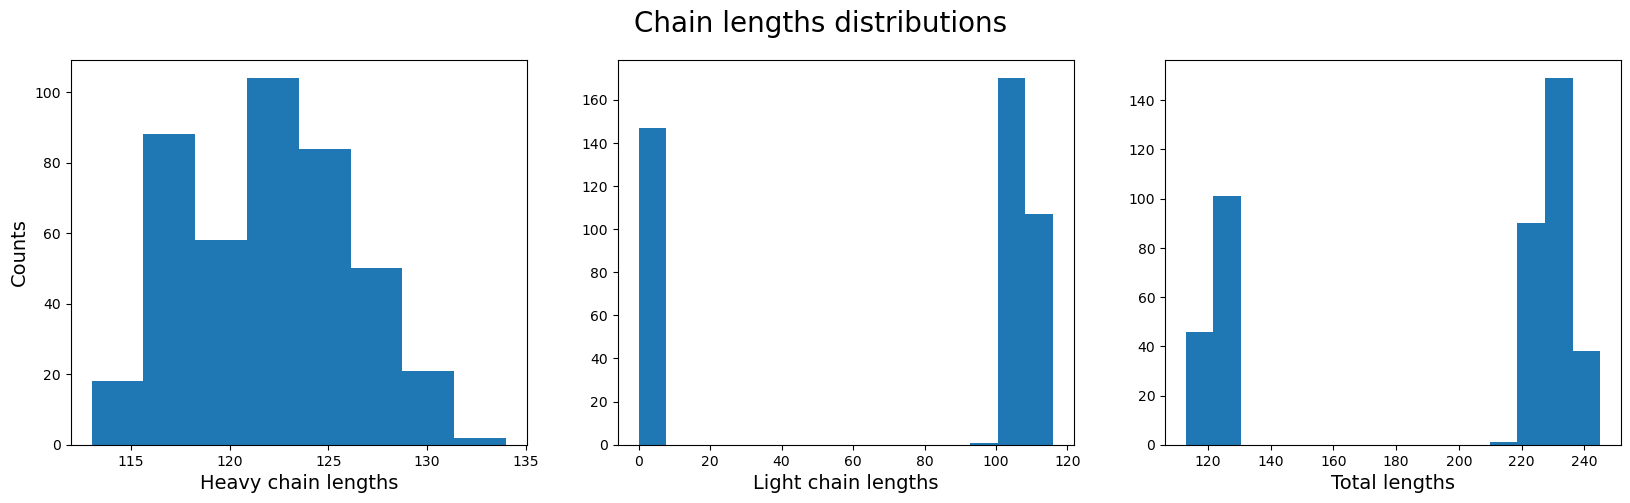

In [9]:
title_size = 20
font_size = 14

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Chain lengths distributions', size=title_size)
ax1.hist(preprocessed_data.heavy, 8)
ax2.hist(preprocessed_data.light, 15)
ax3.hist([sum(x) for x in zip(preprocessed_data.heavy, preprocessed_data.light)], 15)

# Changing plotting settings
ax1.set_ylabel('Counts', size=font_size)
ax1.set_xlabel('Heavy chain lengths', size=font_size)
ax2.set_xlabel('Light chain lengths', size=font_size)
ax3.set_xlabel('Total lengths', size=font_size)

plt.show()

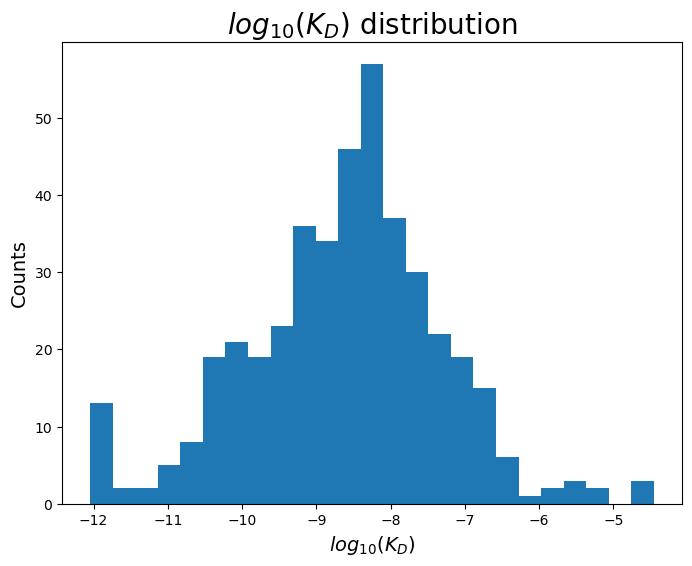

In [10]:
fig = plt.figure(figsize=(8, 6))
plt.title('$log_{10}(K_D)$ distribution', size=title_size)
plt.hist(preprocessed_data.train_y, 25)
plt.xlabel('$log_{10}(K_D)$', size=font_size)
plt.ylabel('Counts', size=font_size)
plt.show()

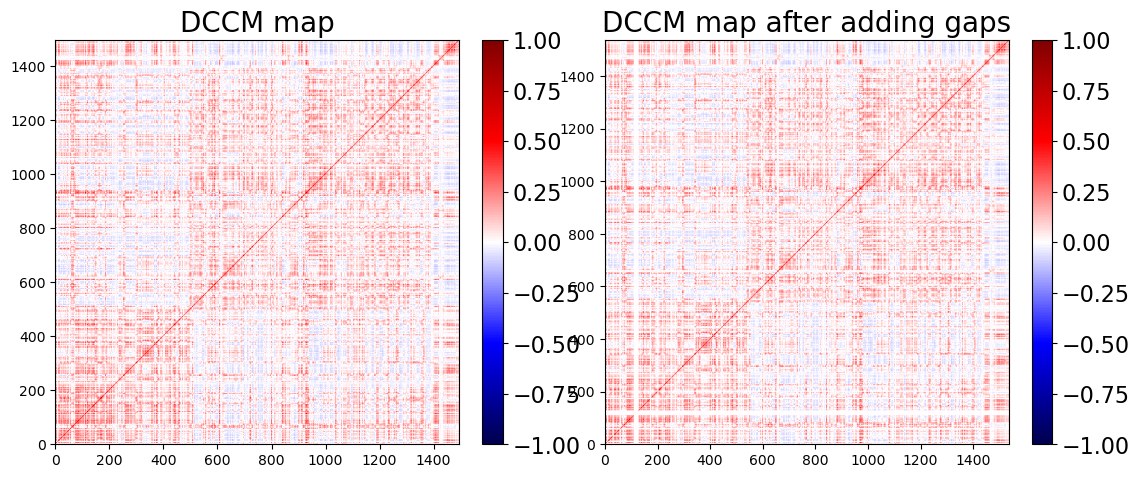

In [11]:
input_shape = preprocessed_data.train_x.shape[-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5.25))
im1 = ax1.imshow(preprocessed_data.raw_imgs[0], origin='lower', cmap='seismic', norm=CenteredNorm())
im2 = ax2.imshow(preprocessed_data.train_x[0].reshape(input_shape, input_shape), origin='lower', cmap='seismic', norm=CenteredNorm())

ax1.set_title('DCCM map', size=title_size)
ax2.set_title('DCCM map after adding gaps', size=title_size)

cb1 = plt.colorbar(im1, ax=ax1, fraction=0.045)
cb2 = plt.colorbar(im2, ax=ax2, fraction=0.045)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
cb1.ax.tick_params(labelsize=16) 
cb2.ax.tick_params(labelsize=16) 

plt.show()

In [12]:
preprocessed_data.train_x.shape

(425, 1537, 1537)

: 

In [ ]:
train_x, test_x, train_y, test_y, idx_tr, idx_te = create_test_set(preprocessed_data, test_size=0.05, random_state=0, threshold=0.9)

All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs passed the similarity check (Identity <= 90.00%)
All train/test pairs

In [10]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([25, 1, 1522, 1522])

In [ ]:
print(idx_tr)

In [ ]:
data_name = 'AbCov-SARSCoV2'
torch.save((train_x, test_x, train_y, test_y, idx_tr, idx_te), os.path.join(DATA_PATH, f'{data_name}_training_data.pt'))

## Training

In [ ]:
from adabelief_pytorch import AdaBelief
from torch.nn import MSELoss
from antipasti.model.model import ANTIPASTI

train_x, test_x, train_y, test_y = torch.load(os.path.join(DATA_PATH, f'{data_name}_training_data.pt'))

In [ ]:
# modes = 'all'
# n_filters = 4
# filter_size = 4
# pooling_size = 1
# n_max_epochs = 1044

# path = '../checkpoints/full_ags_all_modes/model_epochs_' + str(n_max_epochs) + '_modes_' + str(modes) + '_pool_' + str(pooling_size) + '_filters_' + str(n_filters) + '_size_' + str(filter_size) + '.pt'
# model,optimiser,_,train_losses, test_losses = load_checkpoint(path, input_shape)
# model.eval()

In [ ]:
# Optimal hyperparameters
n_filters = 4
filter_size = 4
pooling_size = 1
learning_rate = 5e-5

# Defining the model, optimiser and loss function
model = ANTIPASTI(n_filters=n_filters, filter_size=filter_size, pooling_size=pooling_size, input_shape=input_shape, l1_lambda=2e-3)
criterion = MSELoss() 
optimiser = AdaBelief(model.parameters(), lr=learning_rate, weight_decay=True, eps=1e-16, print_change_log=False) 
print(model)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(model)

In [ ]:
train_losses = []
test_losses = []

In [ ]:
model.train()
n_max_epochs = 500 
max_corr = 0.87
batch_size = 32

train_loss, test_loss, inter_filter, y_test, output_test = training_routine(model, criterion, optimiser, train_x, test_x, train_y, test_y, n_max_epochs=n_max_epochs, max_corr=max_corr, batch_size=batch_size)

# Saving the losses
train_losses.extend(train_loss)
test_losses.extend(test_loss)

